# Canser Classification

###### Dataset Name, Feature, Class Distribution, Missing Value and Outlier 

In [1]:
# Import Library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
# Maching Learning Algorithm Libraries
from sklearn.preprocessing import StandardScaler #Standardizasyon işlemi yapabilmek için
from sklearn.model_selection import train_test_split, GridSearchCV #Verisetini parçalamak için train- test-split ve Knn Algoritmasında Best Parameters'ları seçebilmek için GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix #Model başarısını ölçmek için accuracy_score ve confusion_matrix metrikleri
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor #Kullanaağımız algoritma ve Componenet Analysis(Bileşen Analizi) ve Outlier Detection için 
from sklearn.decomposition import PCA #Principal Componenet Analysis


In [3]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
data= pd.read_csv("data.csv")


In [5]:
data.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


* Verisetimiz 33 sütundan oluşan ve kanser hücrelerin özellikleri ile bize bilgi veren bir verisetidir. 

* Verisetinde Diagnois sütunu bizim hedef özniteliğimiz olacaktır. (Predict edilecek değer.) (M(kötü huylu) ve B(iyi huylu) değerlerini alır.)
* Class dağılımları %63 B değeri %37 M değeri olacak şekildedir.
* Missing Value değerimiz yoktur.

* Veri setimizide bir virgül hatasından kaynaklı Unnamed:32 adlı sütunu ve Id sütununu kaldıracağız. 

In [6]:
data.drop(["Unnamed: 32", "id"], inplace=True, axis=1)

Diagnosis adlı sütunumuzun hedef özniteliğimiz olmasından bahsetmiştik. Bu sebeple bu column name'i "Target" ile değiştireceğiz.

In [7]:
data=data.rename(columns={"diagnosis":"target"})

Target'daki dağılımı gözlemleyebilmek için.

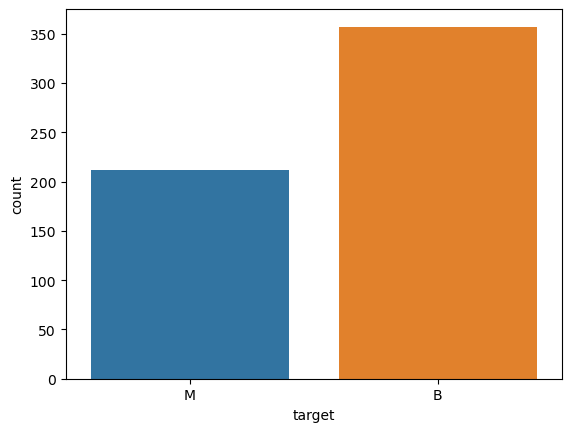

In [8]:
sns.countplot(data=data, x='target')
plt.show()

Target variable değerimizi "M" ve "B" den oluştuğu için kategorical verileri değiştirmemiz gerekiyor. Sayıya çevirmemiz gerekiyor.

In [9]:
data["target"]= [1 if i.strip()== "M" else 0 for i in data.target]

In [10]:
print(len(data))

569


In [11]:
print(data.head())

   target  radius_mean  texture_mean  perimeter_mean  area_mean  \
0       1        17.99         10.38          122.80     1001.0   
1       1        20.57         17.77          132.90     1326.0   
2       1        19.69         21.25          130.00     1203.0   
3       1        11.42         20.38           77.58      386.1   
4       1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           18

In [12]:
print(data.shape)

(569, 31)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [14]:
data.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Veride bazı değerler arasında farklar çok fazla olduğu için veriyi stadardizasyon işlemine tabii tutmalıyız.

### Exploratory Data Analysis (EDA)

İlk etapta sayısal değerler ile uğraştığımız için Correlation Matrisini inceleyelim.

In [15]:
corr_matrix= data.corr()

In [16]:
corr_matrix

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


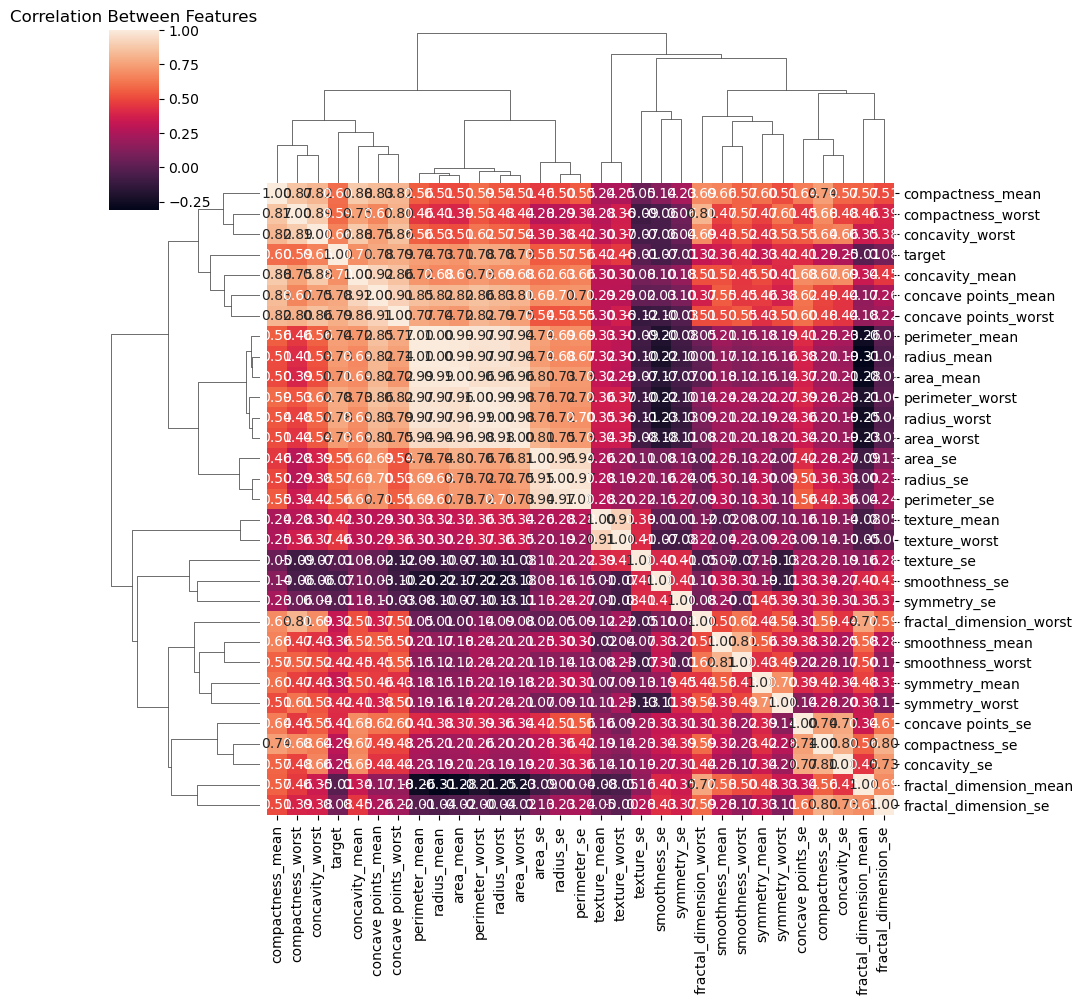

In [17]:
#Visualizate Correlation
corr_matrix= data.corr()
sns.clustermap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Between Features")
plt.show()

Corelasyon matrisi diagonal bir biçimdedir ve köşegen değerleri birdir. Tek bir feature'ın birbirisi arasındaki ilşkiyi temsil eder. Etrafındaki ağaç yapısından biririne en yakın ve birbirini en etkileyen featurelar arasındaki korelasyonu görmek mümkündür.

Korelasyon matrisinden çıkarılabilecek özellikler nedir?

* Birbiriyle ilişkisi olan iki feature 'ın modele katkısı aynıdır. Biz modelimizde çeşitliliği arttırmayı hedefleriz. Biribiryle ilişkisi olmayan featureları bulmak ve belirlememiz gerekir. Feature engineering yapabilmeliyiz.
* Bir de class label'ımızın ilişkili olduğu diğer featureları öğrenmek de modelimizi eğitirken bize kolaylık sağlayacaktır.

###### Threshold

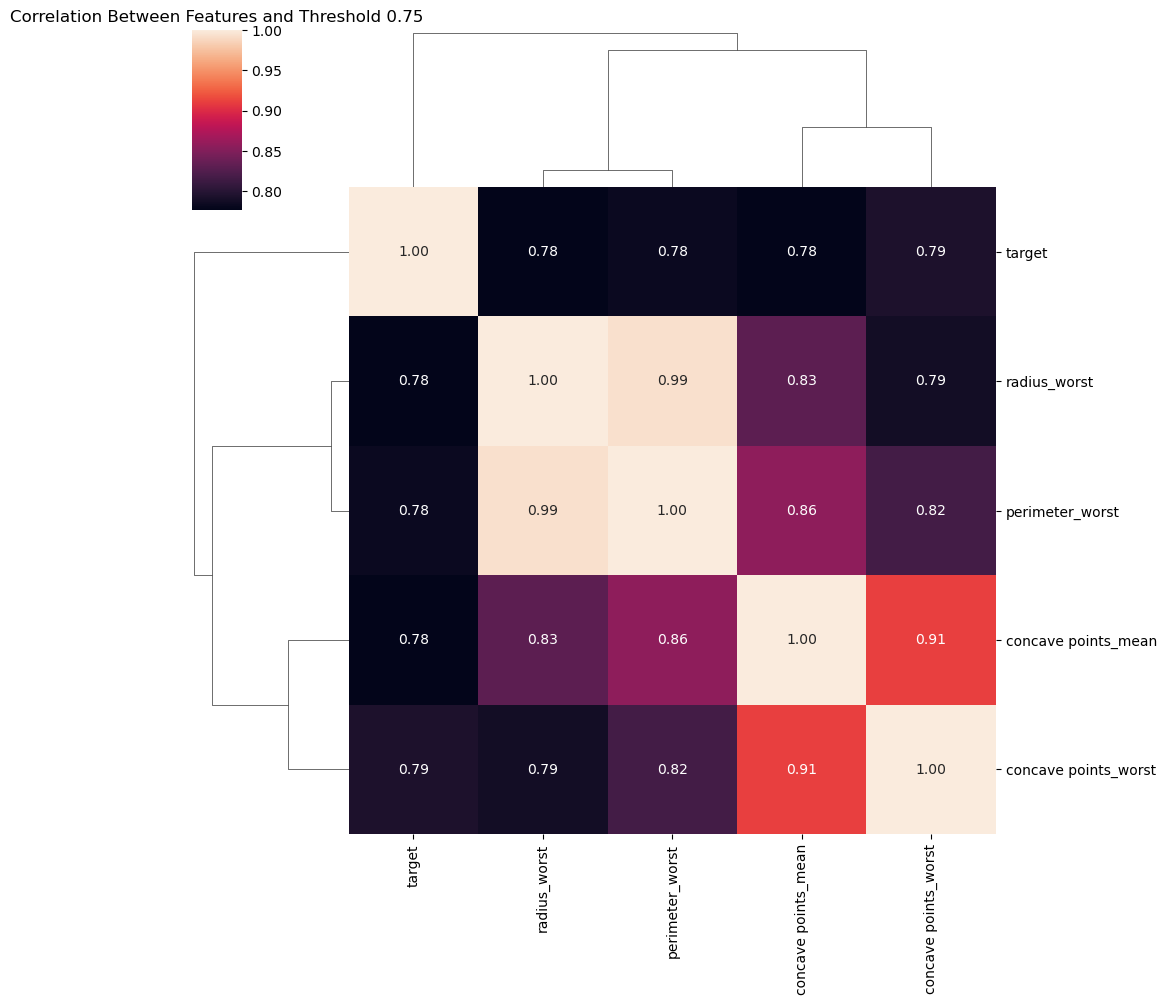

In [18]:
threshold= 0.75
filtre= np.abs(corr_matrix["target"]) > threshold
corr_features= corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr() , annot=True, fmt=".2f")
plt.title("Correlation Between Features and Threshold 0.75")
plt.show()

Korelasyonu yüksek özellikleri modelimizi eğitirken kaldırabilir ya da regularization tekniklerini kullanmamız gerekibilir.

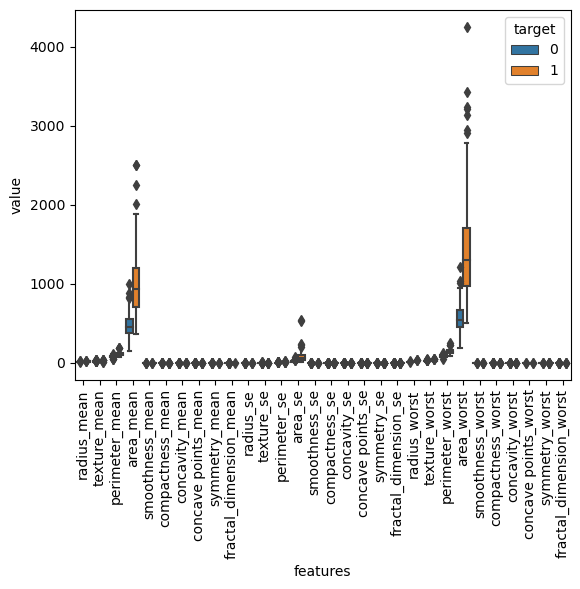

In [19]:
data_melted= pd.melt(data, id_vars= "target", 
                      var_name= "features", 
                      value_name= "value")
plt.figure()
sns.boxplot(x= "features", y= "value", hue="target", data=data_melted)
plt.xticks(rotation= 90)
plt.show()

##### Pair Plot

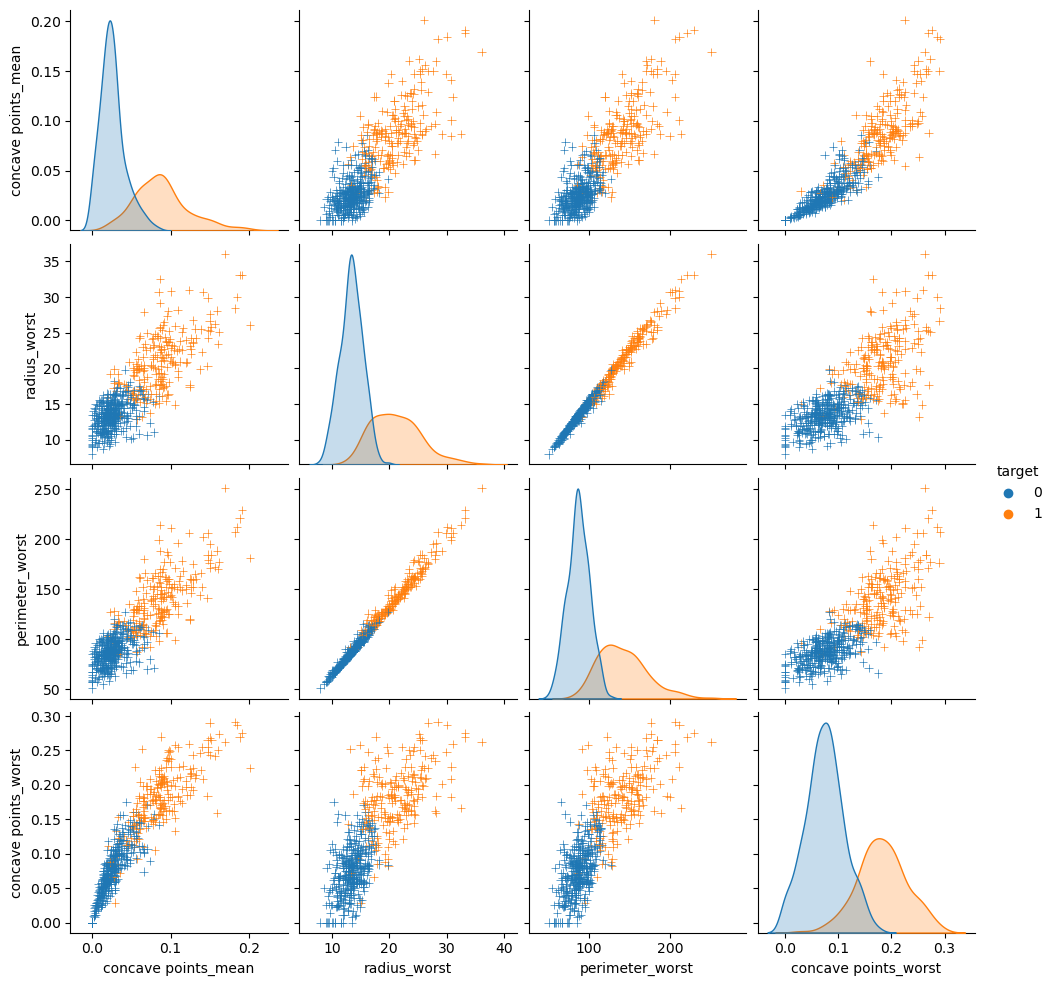

In [20]:
sns.pairplot(data[corr_features], diag_kind= "kde", markers= "+", hue= "target")
plt.show()

Normal dağılım ikiye ayrılır

* Positive Skewness Tail (Tail sağa uzar)
* Negative Skewness Tail (Tail sola uzar)

Outlier detection yaparken bunları handle edebilecek outlier detection yöntemlerini kullanırız. Dağılımları normal dağılıma çeviririz.

Ya da veriyi normal dağılıma çevirmeye çalışırız.


# Outlier Detection Local Outlier Factor Yöntemi

Outlier veriseti içinde bulunan aykırı değerlerdir. Ölçümlerde bulunan hatalardan kaynaklı olabilir. Ayıklanmazsa modeli yanlış yönlendirebilir. Biz Density Based Outlier Detection Yönteminine ait Local Outlier Factor Yöntemini kullanacağız. Bunu kullanma sebebimiz datamızda skewness dağılım olmasıdır.

Point'i en yakın K komşusuna göre local density (yerel dağılımı) karşılaştıracağız. 

Öncesinde datayı X ve Y olmak üzere X'ler feature ve Y'ler de target olacak şekilde ayıralım.

In [21]:
y= data.target
x= data.drop(["target"], axis= 1)
columns= x.columns.tolist() # Verisetimin içinde bulunan columnları bir liste içine atıyoruz. Liste adı columns

Şimdi ilk etapta LocalOutlier Factor'u çağıracağız.

* Local Outlier Factorde bizim için önemli parametrelerden birisi k sayısıdır. Default olarak 20' dir. Biz de 20 kullanacağız.

* Default Değerleri
###### LocalOutlierFactor(n_neighbors=20, algorithm= "auto", leaf_size= 30, metric= "minkowski", p= 2, metrics_paramas= None, contamination="auto", novelty= False, n_jobs= None)


* Local Outlier Factor bize ne döndürüyor? 
* Gerekli işlemleri yaptıktan sonra negatif_outlier_factor adlı bir numpy array döndürür. (Shape: (n_samples, )). LOF ' un tersini döndürüyor.  

* Ardından yarattığımız objeyi fit_predict methodu ile fit ve predict işlemlerini uyguluyoruz. Bu bize y_pred değerlerini döndürecektir. Aslen bu fit_predict değeri bize in_inlier adlı bir array döndürüyor ve bu array outlier değerler için -1, inlier yani outlier olmayan değerler için 1 döndürüyor.




In [22]:
clf= LocalOutlierFactor() #Local Outlier Factor'den bir nesne yarattık
y_pred= clf.fit_predict(x)

In [23]:
y_pred

array([ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1

* Artık y_pred değerlerimiz elimizde fakat bizim outlier_factor değerlerine ihtiyacımız var. clf 'nin içinden negatif Outlier Factor'leri çekeceğiz

In [24]:
x_score= clf.negative_outlier_factor_

* X Score'ları görebilmek için Outlier Score isimli bir DataFrame Oluşturalım.

In [25]:
outlier_score= pd.DataFrame()
outlier_score["score"]= x_score

In [26]:
outlier_score

,score
0,-1.422440
1,-1.066782
2,-0.978948
3,-1.596933
4,-1.069936
...,...
564,-1.330082
565,-0.997906
566,-0.997441
567,-0.993730


* Outlier diye tespit edebilmemiz için yukarıdaki hesaplanan değerlerin belli bir threshold değerinden yüksek olması gerekir. Literatürde genellikle bu thresh için 1 denir. Fakat biz kendi datasetimize göre yeni bir değer tanımlayacağız.

* İlk önce DataPointlerimi görselleştirmek istiyorum. 

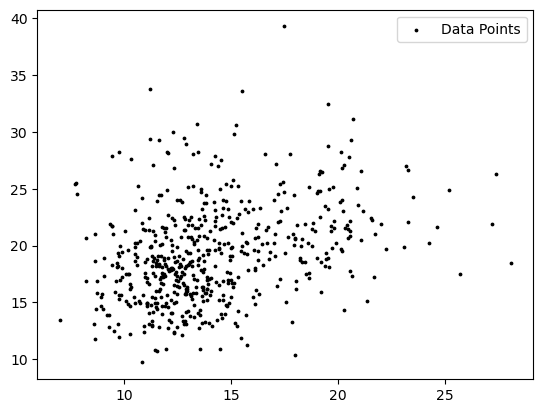

In [27]:
# Visualize
plt.figure()
plt.scatter(x.iloc[:,0],x.iloc[:,1], color="k", s=3, label= "Data Points")
plt.legend()
plt.show()

Şimdi radius diye bir değer tanımlayacağım ve bu değer her bir data pointin outlier olup olmaması ile doğru orantılı olacak yani eğer radius değerim büyükse outlier olmaya yakındır ve eğer radius değerim küçükse outlier değildir. Bu işlemi yorumlayabilmek için yapıyoruz.

In [28]:
# X score değerlerimi normalize edeceğiz.
radius= (x_score.max()- x_score)/ (x_score.max()- x_score.min())

Radius değerimizi görebilmek için dataFrame haline getirip ardından bakalım.

In [29]:
outlier_score["radius"]= radius
outlier_score.head()

,score,radius
0,-1.422440,0.217679
1,-1.066782,0.055159
2,-0.978948,0.015022
3,-1.596933,0.297414
4,-1.069936,0.056600


Her bir data pointimizin etrafını saracak kırmızı çemberler yaptık. Kırmızı çemberle normalize edilmiş outlier_score'lar anlamına gelir. Kımızı dairemizin boyutu bize outlier hakkında bilgi verir.

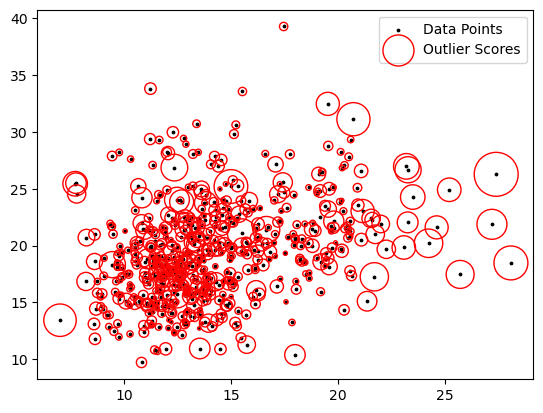

In [30]:
plt.figure()
plt.scatter(x.iloc[:,0],x.iloc[:,1], color="k", s=3, label= "Data Points")
plt.scatter(x.iloc[:,0],x.iloc[:,1], s=1000*radius, edgecolor="r", facecolor="none", label = "Outlier Scores")
plt.legend()
plt.show()

Artık son adımımız olan threshold değerini koyup ardından bunu görselleştirelim. Ve Outler değerleri detect edelim.

In [31]:
threshold= -2.5
filtre= outlier_score["score"]< threshold
outlier_index= outlier_score[filtre].index.tolist()

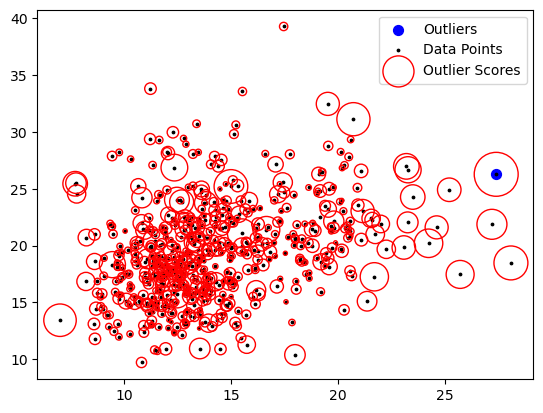

In [32]:
plt.figure()
# Threshold'a göre outlier değerlerin görselleştirilmesi. x' deki outlier değerlerin indexi
plt.scatter(x.iloc[outlier_index, 0], x.iloc[outlier_index, 1], color="b", s=50, label= "Outliers")
# x Verisetinde 0 ve 1. sütunların tüm satır değerlerninin görselleştirilmesi (Data Pointlerimiz)
plt.scatter(x.iloc[:,0],x.iloc[:,1], color="k", s=3, label= "Data Points")
#Normalize edilimş outlier Score'ların data pointlerin etrafında görselleştirilmesi (Outlier Score'larımız)
plt.scatter(x.iloc[:,0],x.iloc[:,1], s=1000*radius, edgecolor="r", facecolor="none", label = "Outlier Scores")
plt.legend()
plt.show()

# Drop Outliers

In [33]:
x= x.drop(outlier_index)
y= y.drop(outlier_index).values

# Train Test Split

In [34]:
test_size=0.3
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= test_size, random_state=42)

In [35]:
print("X train shape: ", x_train.shape)
print("X test shape: ", x_test.shape)
print("Y train shape: ", y_train.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (397, 30)
X test shape:  (171, 30)
Y train shape:  (397,)
Y test shape:  (171,)


# Standardizasyon

Veriyi ölçeklendirmek standardizasyon yaparız:

* ((x- mean()) / (std))

Ortalaması sıfır std si 1 olacak bir veri elde etmeye çalışırız.



Bir scaler nesnesi elde edeceğiz. Ve x_train verisetini StandardScaler() ile fit_transform işlemine tabii tutacağız. Fakat x_test'i yalnızca transform edeceğiz. Bunun sebebi modeli eğitirken kullandığımız x_train olduğu için x_testi x_train'e göre yalnızca transform etmelitiz. fit_transform işlemi uygularsak x_test kendi dağılımına göre standardize olacaktır. Bu durum da modelden bağımsız haline gelir.

In [36]:
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [37]:
# Box Plot Visualize
x_train_df= pd.DataFrame(x_train, columns= columns)

In [38]:
x_train_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.126206,-0.106331,-0.139113,-0.243152,0.200584,0.082163,-0.426589,-0.287204,-0.345793,0.802295,...,-0.243869,0.026662,-0.235439,-0.316803,0.456859,0.060010,-0.359469,0.218125,-0.054096,0.396185
1,1.110155,0.350378,1.085508,0.972350,0.516224,0.541814,0.433900,1.051074,0.668203,-0.276397,...,1.026425,-0.008771,0.960829,0.869669,0.705777,0.841678,0.340937,1.293014,0.281891,0.093907
2,-1.565931,-0.763715,-1.524658,-1.225782,1.326652,-0.408721,-0.589335,-0.780730,-0.582878,1.903286,...,-1.410326,-0.941303,-1.316628,-1.082299,1.762589,-0.075060,-0.092330,-0.146403,0.068515,1.048258
3,0.567081,-0.251647,0.550500,0.456043,0.061958,0.213772,0.101004,0.286230,0.190385,-0.026932,...,0.779600,-0.031319,0.679317,0.656981,-0.027877,-0.160648,0.085079,0.112194,-0.144860,-0.103605
4,-0.487293,0.172769,-0.488764,-0.531209,-0.840888,-0.027839,-0.238905,-0.468792,-0.101412,-0.025539,...,-0.594955,-0.385649,-0.585008,-0.592932,-1.180763,-0.212804,-0.375364,-0.594274,-0.315243,-0.329168


Standardizasyondan sonra mean değerimiz sıfır standard sapma değeri 1 olması beklenir. Kontrol için describe methodunu kullanalım.

In [39]:
x_train_df_describe= x_train_df.describe()

In [40]:
x_train_df_describe

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,...,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02
mean,2.013503e-17,-2.953137e-16,-5.369341e-17,-2.237225e-16,-3.803283e-17,-2.192481e-16,4.474450e-17,7.159121e-17,-1.657784e-15,6.700490e-16,...,1.566058e-16,-4.608684e-16,-4.541567e-16,-6.487953e-17,6.577442e-16,-1.118613e-16,8.054011e-17,-7.159121e-17,-5.481202e-17,4.027005e-17
std,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,...,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00
min,-1.712388e+00,-2.175361e+00,-1.632924e+00,-1.303791e+00,-2.404872e+00,-1.638974e+00,-1.126020e+00,-1.291511e+00,-2.340956e+00,-1.731378e+00,...,-1.554165e+00,-2.165353e+00,-1.558852e+00,-1.163524e+00,-2.217924e+00,-1.426295e+00,-1.351626e+00,-1.782104e+00,-2.098683e+00,-1.623010e+00
25%,-7.039450e-01,-7.291157e-01,-7.065592e-01,-6.765379e-01,-7.086599e-01,-7.677983e-01,-7.505222e-01,-7.462174e-01,-6.923019e-01,-7.154003e-01,...,-6.821946e-01,-7.528643e-01,-7.019438e-01,-6.578384e-01,-7.527979e-01,-6.715073e-01,-7.547935e-01,-7.847938e-01,-6.687460e-01,-6.938485e-01
50%,-2.446426e-01,-1.109439e-01,-2.549616e-01,-2.989145e-01,-9.870612e-02,-2.500035e-01,-3.559314e-01,-3.888829e-01,-3.575803e-02,-1.774476e-01,...,-2.715302e-01,-5.708877e-02,-2.809144e-01,-3.430225e-01,-4.097822e-02,-2.830139e-01,-2.487165e-01,-2.253839e-01,-1.273445e-01,-2.398587e-01
75%,4.919745e-01,5.648931e-01,5.336490e-01,3.852569e-01,6.086412e-01,5.418139e-01,4.663710e-01,6.740944e-01,5.587789e-01,4.845408e-01,...,4.880926e-01,6.757303e-01,5.339215e-01,2.884427e-01,6.097035e-01,5.982844e-01,5.947450e-01,7.322025e-01,4.793437e-01,4.494271e-01
max,4.033514e+00,4.645288e+00,4.063861e+00,5.327298e+00,4.767417e+00,4.097233e+00,4.417475e+00,4.049923e+00,4.490747e+00,4.845302e+00,...,3.590418e+00,3.877586e+00,3.782128e+00,4.325859e+00,3.771406e+00,4.615614e+00,3.461489e+00,2.511223e+00,5.979346e+00,5.130159e+00


In [42]:
x_train_df["target"]= y_train

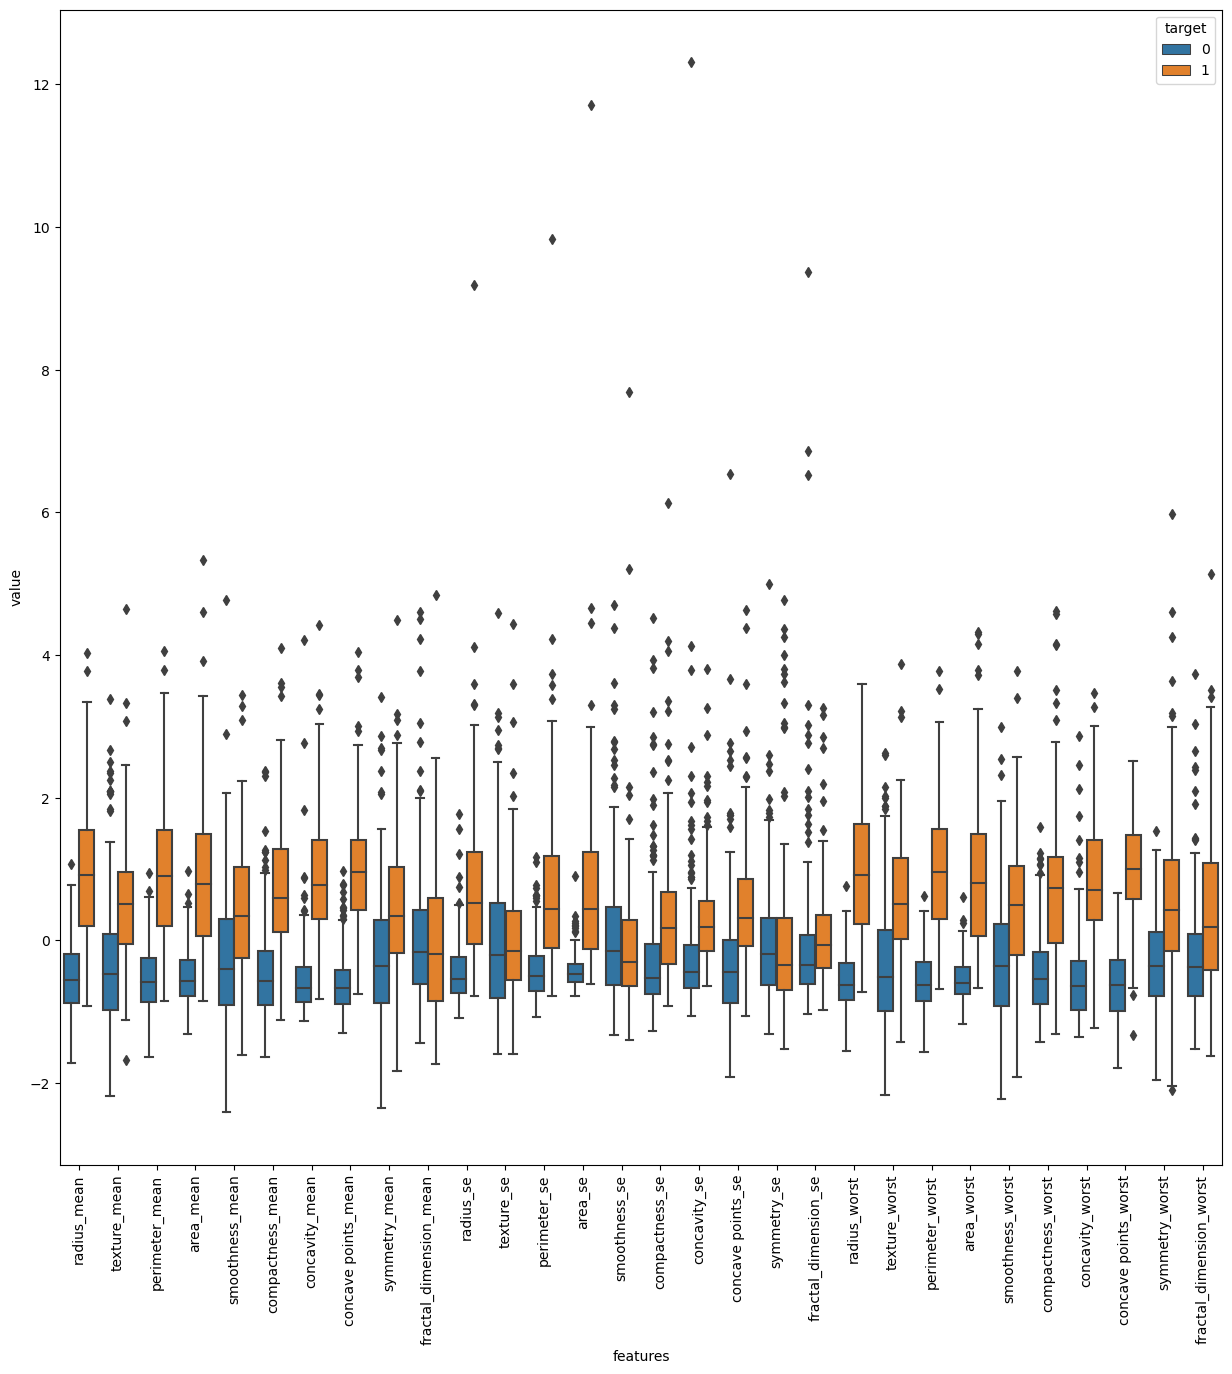

In [45]:
# Visualize Box Plot
data_melted= pd.melt(x_train_df, id_vars= "target", 
                      var_name= "features", 
                      value_name= "value")
plt.figure(figsize=(15,15))
sns.boxplot(x= "features", y= "value", hue="target", data=data_melted)
plt.xticks(rotation= 90)
plt.show()

# KNN

###### Knn Algoritması Avantajları ve Dezavantajları

###### Avantajları
* Tune etmesi kolay (Yalnızca k ve distance parametreleri)
* Kolay implemente etmesi


###### Dezavantajları
* Outlier Sensitivy yüksektir.
* Big Data'da (çok boyutlu verisetinde) iyi işlev görmezdir.
* Feature scaling yapılması gerekir.
* İmbalance datada Knn'de sıkıntılar çıkabilir.

In [46]:
knn= KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test) #x_test'i predict etmek
cm= confusion_matrix(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)
score= knn.score(x_test, y_test)

print("Accuracy: ",acc)
print("Score: ", score)

Accuracy:  0.9532163742690059
Score:  0.9532163742690059


In [47]:
# confusion_matrix'de sonuçlara bakalım
cm

array([[108,   1],
       [  7,  55]], dtype=int64)

* iyi huylu tümörlerden 108'i doğru, 1'i (1 tanesi kötü huylu diye tahmin edilmiştir.) yanlış tahmin edilmiştir.
* kötü huylu tümörlerden 7'si (7 tanesi iyi huylu diye tahmin edilmiştir.) yanlış 55'ini doğru tahmin edilmiştir.

# KNN Best Parameters

* Başarımızı test veriseti ile test ettik fakat train verisetindeki başarımızı henüz test etmedik. Verisetimizde undefitting ya da overfitting var mı bunu incelemeliyiz. 

Knn' nin parametrelerini 

**KNeighborsClassifier(n_neighbors=5, weights="uniform", algorithm="auto", leaf_size= 30, p=2, metric= "minkowski", metric_params= None, n_jobs= None, * * kwargs)**

* Biz burada en iyi parametreleri belirleyeceğiz.

In [48]:
def Knn_Best_Params(x_train, x_test, y_train,y_test):
    k_range= list(range(1,31))
    weight_options= ["uniform", "distance"]
    print()
    #GridSearch yapmak için parametreleri bir sözlüğe koymalıyız
    param_grid= dict(n_neighbors= k_range, weights= weight_options)
    
    knn= KNeighborsClassifier()
    # GridSearh yaparken knn algo kullan ve param_grid'deki değerleri kullan crossval=10 ve score olarak doğruluk değerini kabul edeceğiz 
    grid= GridSearchCV(knn, param_grid, cv=10, scoring= "accuracy")
    grid.fit(x_train, y_train)
    print("Best traning score: {} with parameters {}".format(grid.best_score_, grid.best_params_))
    print()
    
    
    #Artık en iyi parametrelere sahibiz bu parametreleri test verisetinde kullanabiliriz
    knn= KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)
    
    
    #Test tahmin değerlerimiz
    y_pred_test= knn.predict(x_test)
    
    #Train tahmin değerlerimiz
    y_pred_train= knn.predict(x_train)
    
    #Test verisetinde confusion_matrix değerleri
    cm_test= confusion_matrix(y_test, y_pred_test)
    
    #Train verisetinde confusion_matrix değerleri
    cm_train= confusion_matrix(y_train, y_pred_train)
    
    
    #Accuracy Test
    acc_test= accuracy_score(y_test, y_pred_test)
    
    #Accuracy Train
    acc_train= accuracy_score(y_train, y_pred_train)
    
    print("Test Score: ", acc_test)
    print("Train Score: ", acc_train)
    
    print()
    
    print("CM Test: ",cm_test)
    print("CM Train: ",cm_train)
    
    return grid

    

In [49]:
grid= Knn_Best_Params(x_train, x_test, y_train,y_test)


Best traning score: 0.9670512820512821 with parameters {'n_neighbors': 4, 'weights': 'uniform'}

Test Score:  0.9590643274853801
Train Score:  0.9773299748110831

CM Test:  [[107   2]
 [  5  57]]
CM Train:  [[248   0]
 [  9 140]]


# Principal Component Analysis

* Verinin bilgisini mümkün olduğunca tutup boyutunu azaltmaya çalıştığımız adımdır.
* Aslında verisetimiz çok boyutlu değil fakat görselleştirme yapabilmek için PCA kullanılabilir.
* PCA algoritmasının amacı eigen value ve eigen vectorleri bulmaktır.

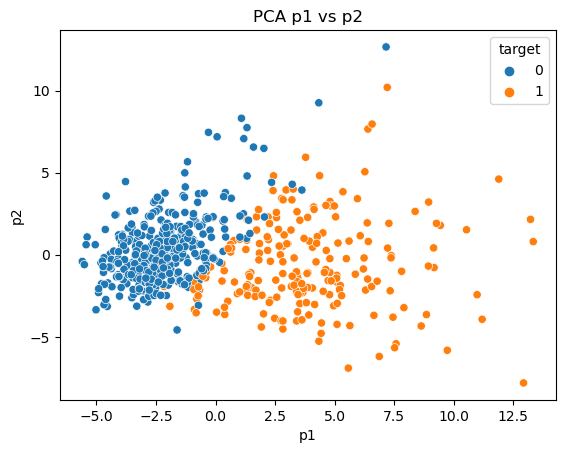

In [50]:
# 30 boyutlu veriyi görselleştiremek için iki boyutlu hale getirelim

scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

pca = PCA(n_components=2)
pca.fit(x_scaled)
x_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(x_reduced_pca, columns= ["p1", "p2"])
pca_data["target"]= y
sns.scatterplot(x= "p1", y="p2", hue="target", data=pca_data)
plt.title("PCA p1 vs p2")
plt.show()

In [51]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca= train_test_split(x_reduced_pca ,y, test_size= test_size, random_state=42)
grid_pca = Knn_Best_Params(x_train_pca, x_test_pca, y_train_pca, y_test_pca)


Best traning score: 0.9419230769230769 with parameters {'n_neighbors': 9, 'weights': 'uniform'}

Test Score:  0.9239766081871345
Train Score:  0.947103274559194

CM Test:  [[103   6]
 [  7  55]]
CM Train:  [[241   7]
 [ 14 135]]


# Visualize

Text(0.5, 1.0, "2-Class Classification (k= 9, weights= 'uniform')")

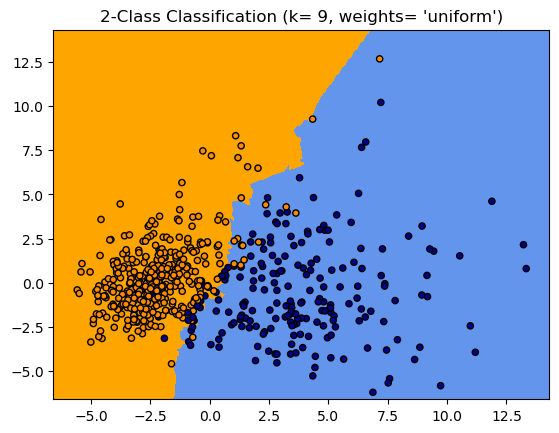

In [58]:
cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "darkblue"])

h= .05 #step size the mesh
x= x_reduced_pca
x_min, x_max= x[:,0].min() -1, x[:,0].max() + 1 
y_min, y_max= x[:,0].min() -1, x[:,0].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
z = grid_pca.best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,z, cmap= cmap_light)

plt.scatter(x[:,0],x[:,1],c=y, cmap=cmap_bold, edgecolor= "k", s=20),
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class Classification (k= %i, weights= '%s')"
          % (len(np.unique(y)), grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))


# Neighborhood Component Analysis

Text(0.5, 1.0, 'NCA: P1 vs P2')

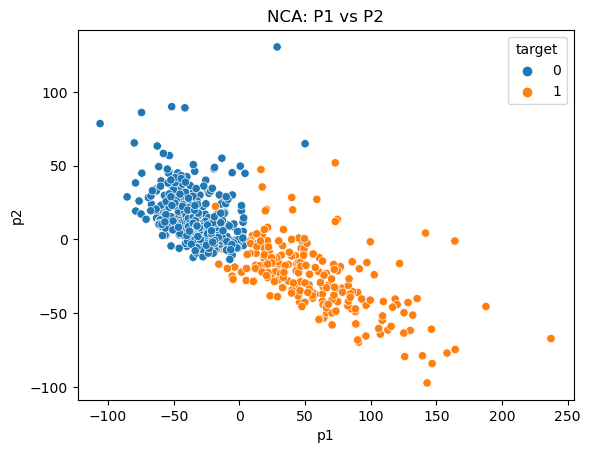

In [60]:
nca= NeighborhoodComponentsAnalysis(n_components=2, random_state=42)
nca.fit(x_scaled, y)
x_reduced_nca= nca.transform(x_scaled)
nca_data= pd.DataFrame(x_reduced_nca, columns= ["p1", "p2"])
nca_data["target"]= y
sns.scatterplot(x="p1", y="p2", hue="target", data=nca_data)
plt.title("NCA: P1 vs P2")

In [61]:
x_train_nca, x_test_nca, y_train_nca, y_test_nca= train_test_split(x_reduced_nca ,y, test_size= test_size, random_state=42)
grid_nca = Knn_Best_Params(x_train_nca, x_test_nca, y_train_nca, y_test_nca)


Best traning score: 0.9873076923076922 with parameters {'n_neighbors': 1, 'weights': 'uniform'}

Test Score:  0.9941520467836257
Train Score:  1.0

CM Test:  [[108   1]
 [  0  62]]
CM Train:  [[248   0]
 [  0 149]]
